<a href="https://colab.research.google.com/github/nabarahim/AFIB-and-MI-Correlation/blob/main/PTBDB_dataset%2B%20Feature%20Engineering%20%2BCNN_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
import scipy.io.wavfile
import scipy.signal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_ptbdb_normal = pd.read_csv('/content/drive/MyDrive/ECG/ptbdb_normal.csv', header=None)
df_ptbdb_abnormal = pd.read_csv('/content/drive/MyDrive/ECG/ptbdb_abnormal.csv', header=None)
df = pd.concat([df_ptbdb_normal, df_ptbdb_abnormal], axis=0)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14552 entries, 0 to 10505
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 21.0 MB
None


In [ ]:
# mitbih+ptbdb
M = df.values
X= M[:,:-1]
y = M[:,-1]

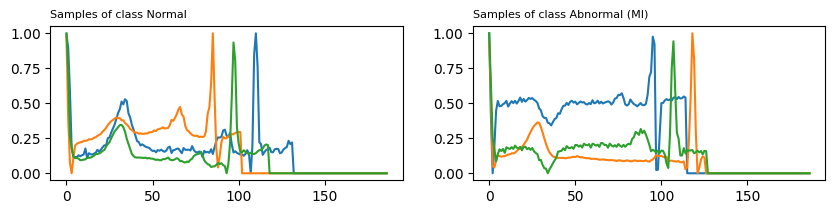

In [ ]:
classes={0:"Normal", 1:"Abnormal (MI)"}
plt.figure(figsize=(10,2))
for i in range(0,2):
    plt.subplot(1,2,i + 1)
    all_samples_indexes = np.where(y == i)[0]
    rand_samples_indexes = np.random.randint(0, len(all_samples_indexes), 3)
    rand_samples = X[rand_samples_indexes]
    plt.plot(rand_samples.transpose())
    plt.title("Samples of class " + classes[i], loc="left", fontdict={'fontsize':8})

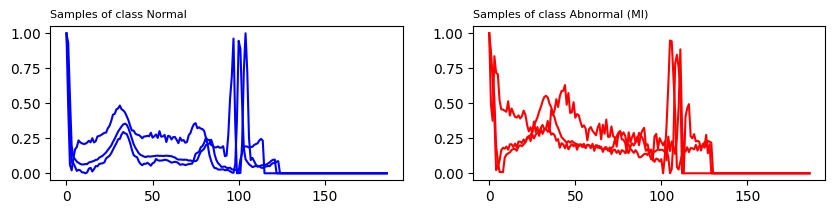

In [ ]:
colors = ['blue', 'red',]  # Specify the colors for each class
classes = {0: "Normal", 1: "Abnormal (MI)"}

plt.figure(figsize=(10, 2))

for i in range(0, 2):
    plt.subplot(1, 2, i + 1)
    all_samples_indexes = np.where(y == i)[0]
    rand_samples_indexes = np.random.randint(0, len(all_samples_indexes), 3)
    rand_samples = X[rand_samples_indexes]
    for j in range(3):
        plt.plot(rand_samples[j].transpose(), color=colors[i])  # Set the color for each signal
    plt.title("Samples of class " + classes[i], loc="left", fontdict={'fontsize': 8})

plt.show()

In [ ]:
repartition = df[187].astype(int).value_counts()
print(repartition)

1    10506
0     4046
Name: 187, dtype: int64


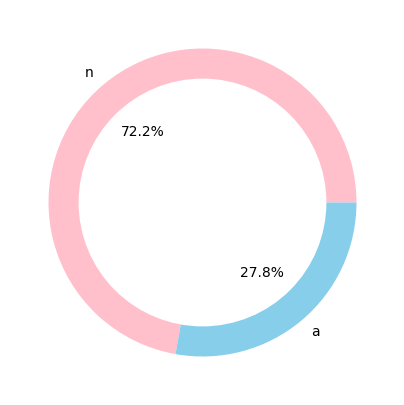

In [ ]:
plt.figure(figsize=(5,5))
circle=plt.Circle( (0,0), 0.8, color='white')
plt.pie(repartition, labels=['n','a'], colors=['pink','skyblue'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

**Denosing using Butterworth**

In [ ]:
signal_df = pd.DataFrame(df)

In [ ]:
signal_df

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


Text(0.5, 1.0, 'Original Data')

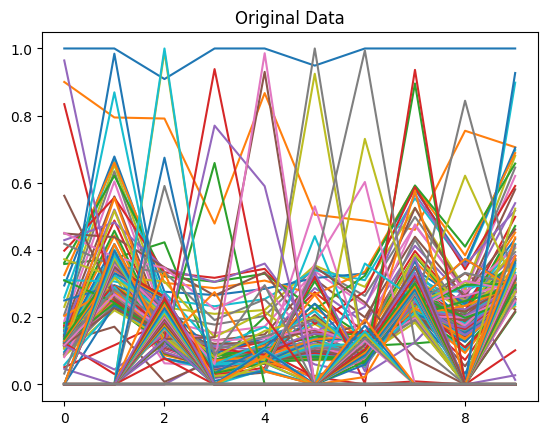

In [ ]:
plt.plot(signal_df[0:10])
plt.title('Original Data')

In [ ]:
df.shape

(14552, 188)

In [ ]:
from scipy.signal import butter, lfilter

In [ ]:
fs = 1000  # Sampling frequency
# Generate the time vector properly
t = np.arange(1000) / fs

In [ ]:
from scipy.signal.signaltools import filtfilt
def butter_lowpass(data,cutoff, sample_rate, order=2):
   b, a = butter_lowpass(cutoff = 2, sample_rate = 100, order = 2)
#   b, a = butter_lowpass(cutoff = 4.5, sample_rate = 12.5, order = 5)
   nyq = 0.5 * sample_rate
   normal_cutoff = cutoff / nyq
   b, a = butter(order, normal_cutoff, btype='low', analog=False)
   y = lfilter(b, a, df)
   return y

<ipython-input-15-d4cdf6a76e88>:1: DeprecationWarning: Please use `filtfilt` from the `scipy.signal` namespace, the `scipy.signal.signaltools` namespace is deprecated.
  from scipy.signal.signaltools import filtfilt


In [ ]:
fs = 50.0       # sample rate, Hz
cutoff = 3    # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 2 Hz
order = 2       # sin wave can be approx represented as quadratic
def butter_lowpass_filter(data, cutoff, fs, order):
    print("Cutoff freq " + str(cutoff))
    nyq = 0.5 * fs # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a,data)
    return y

In [ ]:
filter = butter_lowpass_filter(df, cutoff, fs, order)

Cutoff freq 3


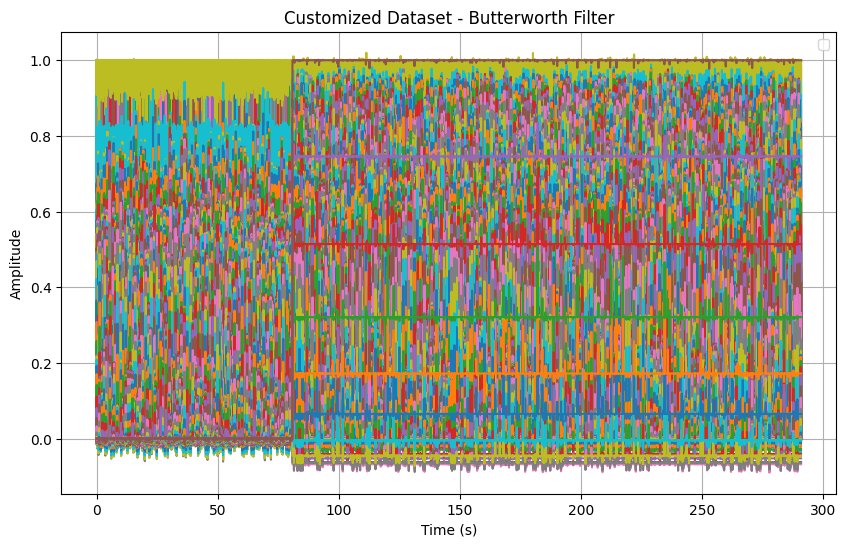

In [ ]:
# Plot the original and filtered signals
time = np.arange(len(signal_df)) / fs

plt.figure(figsize=(10, 6))
plt.plot(time, signal_df)
plt.plot(time, filter)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Customized Dataset - Butterworth Filter')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


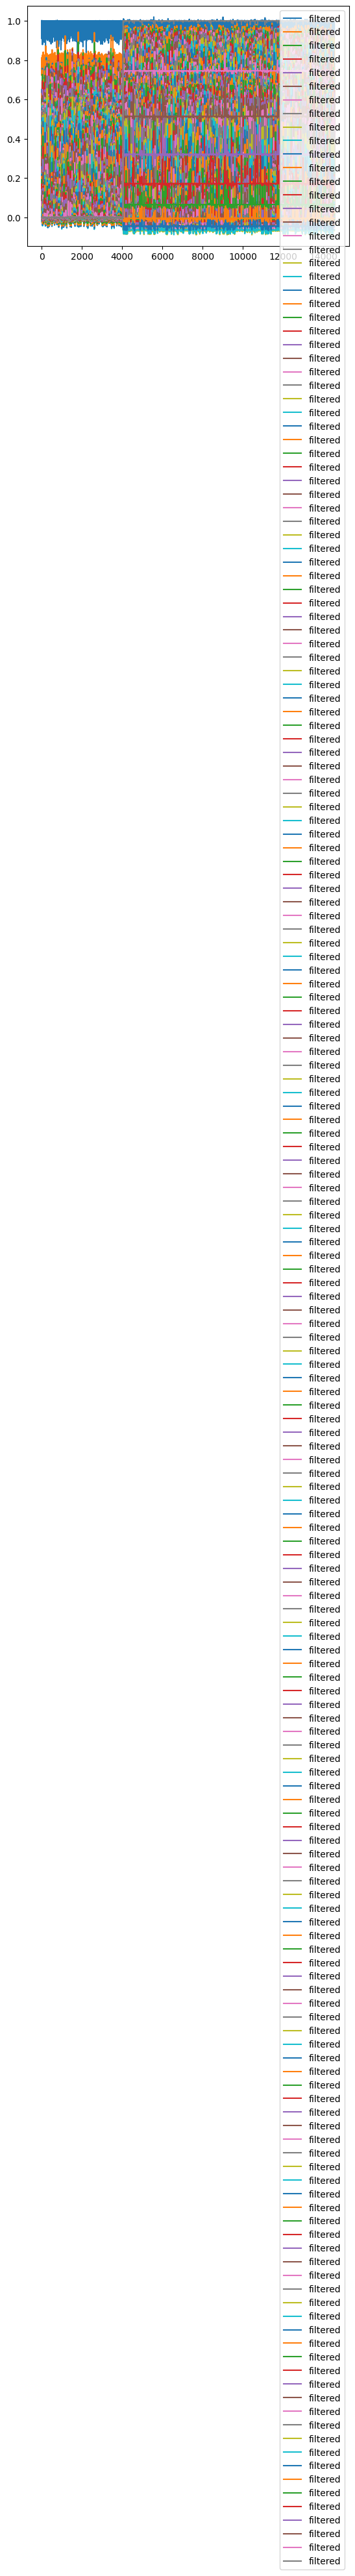

In [ ]:
plt.plot(filter,label="filtered")
plt.legend()
plt.show()

**Pan Tompkins Segment**

In [ ]:
# Convert the dataset to a NumPy array
data = np.array(filter)

In [ ]:
# def pan_tompkins(data):
#   """
#   Applies the Pan-Tompkins algorithm to a signal.

#   Args:
#     data: The signal to be analyzed.

#   Returns:
#     The fundamental frequency of the signal, and the times of the peaks.
#   """

#   # Define the filter coefficients
#   cutoff_frequency = 0.5
#   order = 2
#   b, a = butter(order, cutoff_frequency, btype='low')

#   # Filter the signal
#   filtered_data = lfilter(b, a, data)

#   # Apply the Hilbert transform
#   analytic_signal = scipy.signal.hilbert(filtered_data)

#   # Calculate the squared magnitude of the analytic signal
#   squared_magnitude = np.abs(analytic_signal)**2

#   # Find the peaks in the squared magnitude
#   peak_indices = np.argmax(squared_magnitude)

#   # Calculate the fundamental frequency
#   f0 = np.array([60 / (peak_indices[1] - peak_indices[0])])

#   # Return the fundamental frequency and the times of the peaks
#   return f0, peak_indices

In [ ]:
# def pan_tompkins(data):
#   """
#   Applies the Pan-Tompkins algorithm to a signal.

#   Args:
#     data: A NumPy array of the signal data.

#   Returns:
#     A tuple of the peak locations and the peak heights.
#   """

#   # Compute the first derivative of the signal.
#   ddata = np.diff(data)

#   # Compute the squared magnitude of the derivative.
#   mdata = ddata**2

#   # Compute the Hilbert transform of the squared magnitude.
#   hdata = np.imag(scipy.signal.hilbert(mdata))

#   # Compute the threshold.
#   threshold = 0.2 * np.std(hdata)

#   # Find the peaks in the Hilbert transform.
#   peaks = np.where(hdata > threshold)[0]

#   # Return the peak locations and the peak heights.
#   return peaks, hdata[peaks]

In [ ]:
# # Apply the Pan-Tompkins algorithm
# peaks, _ = pan_tompkins(data)

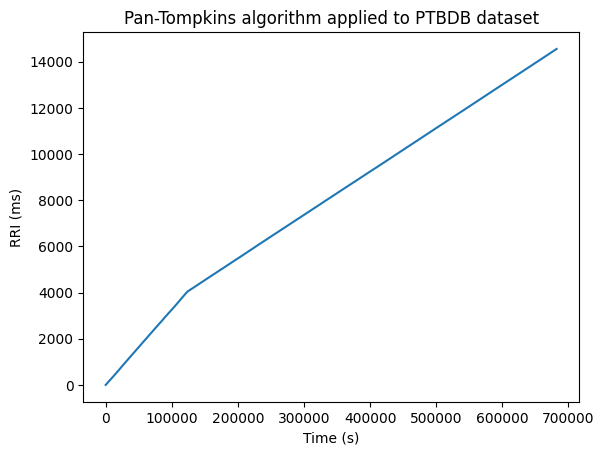

In [ ]:
# # Plot the results in wavelet signal form
# plt.figure()
# # plt.plot(data)
# plt.plot(peaks)
# plt.title('Pan-Tompkins algorithm applied to PTBDB dataset')
# plt.xlabel('Time (s)')
# plt.ylabel('RRI (ms)')
# plt.show()

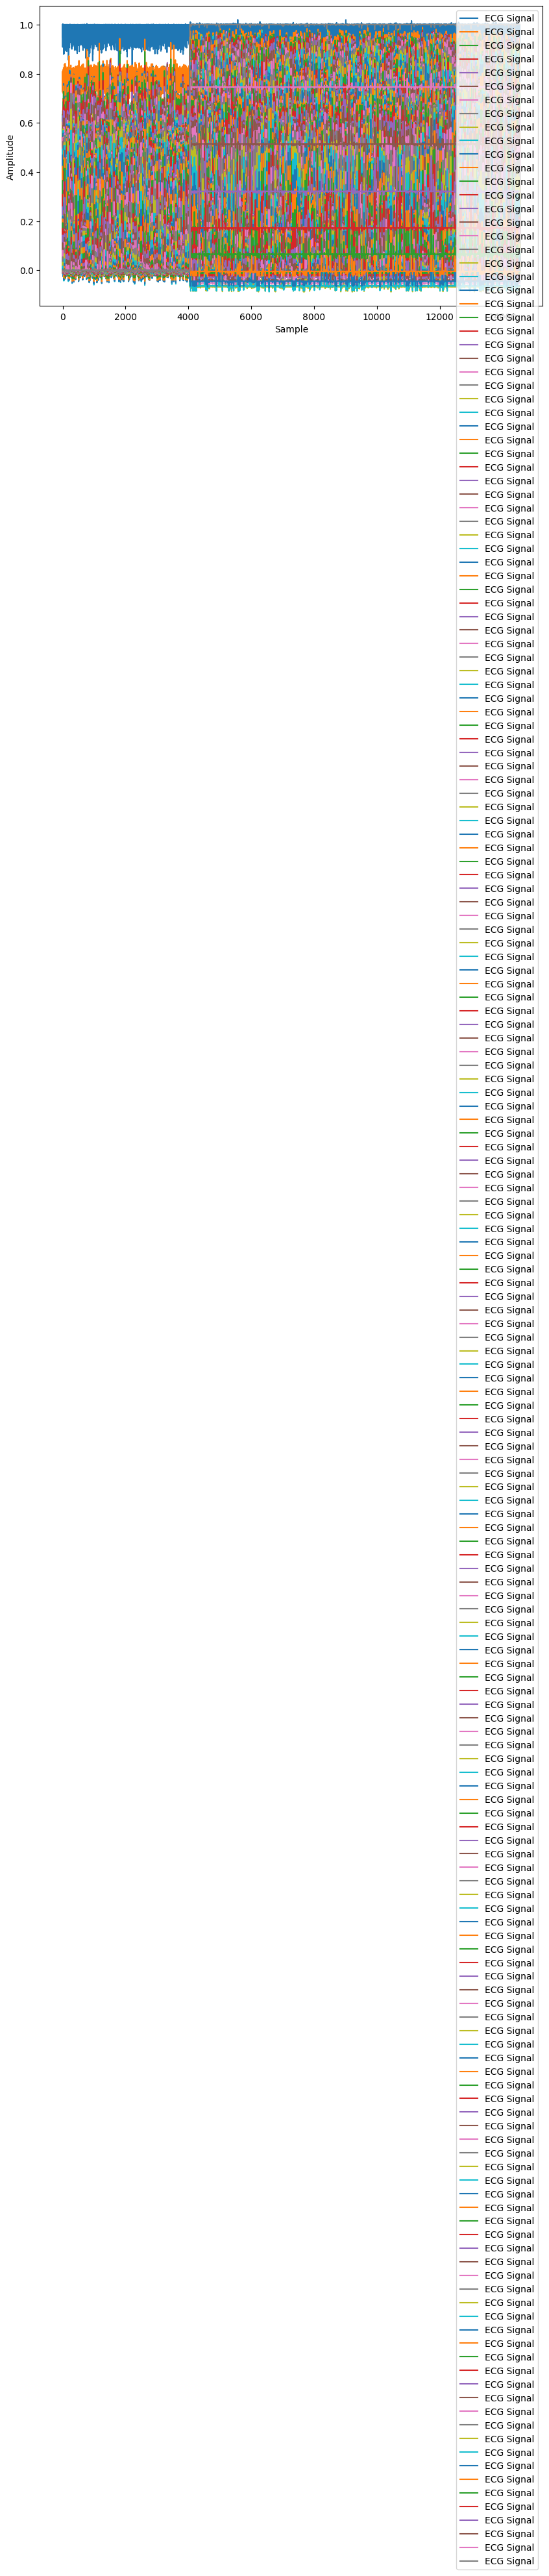

In [ ]:
# from matplotlib import pyplot as plt

# # Plot the original ECG signal and the detected QRS complexes
# plt.figure(figsize=(10, 6))
# plt.plot(data, label='ECG Signal')
# plt.xlabel('Sample')
# plt.ylabel('Amplitude')
# plt.legend()
# plt.show()

In [ ]:
!pip install wfdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 5.1 MB/s eta 0:00:00


In [ ]:
# import wfdb
# from scipy import signal

In [ ]:
# # Apply the Pan-Tompkins algorithm
# qrs_indices = wfdb.processing.gqrs_detect(sig=data, fs=fs)

AttributeError: ignored

**Normalization using MinMax**

In [ ]:
filter.shape

(14552, 188)

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize the data
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(filter)

In [ ]:
print(normalized_data)

[[0.9491143  0.55819508 0.31231357 ... 0.0150192  0.01281346 0.01273156]
 [0.94771416 0.5866766  0.36301577 ... 0.01501913 0.01281339 0.0127315 ]
 [0.71791953 0.39200711 0.20905401 ... 0.01556471 0.01324077 0.01303498]
 ...
 [0.95072983 0.6506484  0.44661774 ... 0.74272629 0.89347349 0.998107  ]
 [0.94985271 0.73063489 0.57381269 ... 0.74271684 0.89347278 0.99810998]
 [0.94392288 0.60049123 0.37941194 ... 0.74271318 0.8934703  0.99810843]]


In [ ]:
normalized_data.shape

(14552, 188)

In [ ]:
# Standardize the data
standard_scaler = StandardScaler()
standardized_data = standard_scaler.fit_transform(normalized_data)

In [ ]:
standardized_data.shape

(14552, 188)

**Feature Scaling using PCA**

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA for feature scaling
pca = PCA(n_components = 50)
X_pca = pca.fit_transform(standardized_data)

In [ ]:
X_pca.shape

(14552, 50)

**Plotting**

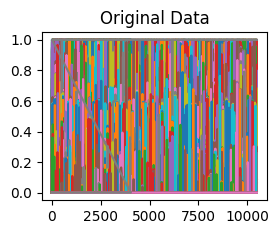

In [ ]:
import matplotlib.pyplot as plt

# Display the original data
plt.subplot(2, 2, 1)
plt.plot(df)
plt.title('Original Data')

plt.show()


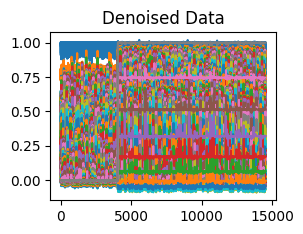

In [ ]:
# Display the normalized data
plt.subplot(2, 2, 1)
plt.plot(filter)
plt.title('Denoised Data')

plt.show()

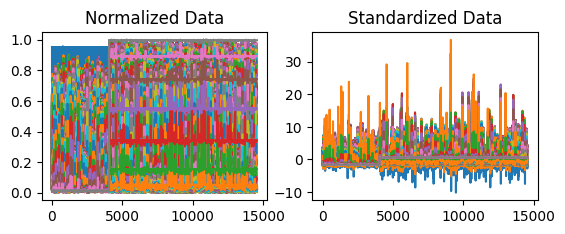

In [ ]:
# Display the normalized data
plt.subplot(2, 2, 1)
plt.plot(normalized_data)
plt.title('Normalized Data')

# Display the standardized data
plt.subplot(2, 2, 2)
plt.plot(standardized_data)
plt.title('Standardized Data')

plt.show()

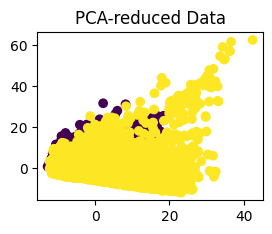

In [ ]:
# Display the PCA-reduced data
plt.subplot(2, 2, 1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.title('PCA-reduced Data')

plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.15)

In [ ]:
X_train.shape
X_test.shape

(2183, 50)

In [ ]:
y_train.shape
y_test.shape

(2183,)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Activation, Add, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

In [ ]:
# Build the CNN model
model = Sequential()
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(50, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())  # Add a normalization layer
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(0.0005, decay_steps=10000, decay_rate=0.75)
adam = Adam(learning_rate=lr_schedule, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def f1_score(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_score])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 48, 64)            256       
                                                                 
 conv1d_6 (Conv1D)           (None, 46, 64)            12352     
                                                                 
 batch_normalization_2 (Batc  (None, 46, 64)           256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 23, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1472)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1472)             

In [ ]:
# from tensorflow.keras.layers import Input, Conv1D, MaxPool1D, Activation, Add, Dense, Flatten
# input_shape = (188, 1)

# def make_model(final_layer_size=5):
#     I = Input(input_shape)
#     C = Conv1D(filters=32, kernel_size=5)(I)

#     C11 = Conv1D(filters=32, kernel_size=5, activation='swish', padding='same')(C)
#     C12 = Conv1D(filters=32, kernel_size=5, padding='same')(C11)
#     A11 = Add()([C, C12])
#     R11 = Activation(activation='swish')(A11)
#     M11 = MaxPool1D(pool_size=5, strides=2)(R11)

#     C21 = Conv1D(filters=32, kernel_size=5, activation='swish', padding='same')(M11)
#     C22 = Conv1D(filters=32, kernel_size=5, padding='same')(C21)
#     A21 = Add()([M11, C22])
#     R21 = Activation(activation='swish')(A21)
#     M21 = MaxPool1D(pool_size=5, strides=2)(R21)

#     C31 = Conv1D(filters=32, kernel_size=5, activation='swish', padding='same')(M21)
#     C32 = Conv1D(filters=32, kernel_size=5, padding='same')(C31)
#     A31 = Add()([M21, C32])
#     R31 = Activation(activation='swish')(A31)
#     M31 = MaxPool1D(pool_size=5, strides=2)(R31)

#     C41 = Conv1D(filters=32, kernel_size=5, activation='swish', padding='same')(M31)
#     C42 = Conv1D(filters=32, kernel_size=5, padding='same')(C41)
#     A41 = Add()([M31, C42])
#     R41 = Activation(activation='swish')(A41)
#     M41 = MaxPool1D(pool_size=5, strides=2)(R41)

#     C51 = Conv1D(filters=32, kernel_size=5, activation='swish', padding='same')(M41)
#     C52 = Conv1D(filters=32, kernel_size=5, padding='same')(C51)
#     A51 = Add()([M41, C52])
#     R51 = Activation(activation='swish')(A51)
#     M51 = MaxPool1D(pool_size=5, strides=2)(R51)

#     F1 = Flatten()(M51)
#     D1 = Dense(32)(F1)
#     R1 = Activation(activation='swish')(D1)
#     D2 = Dense(32)(R1)
#     D3 = Dense(final_layer_size)(D2)

#     O = Activation(activation='sigmoid')(D3)

#     return Model(inputs=I, outputs=O)

In [ ]:
# n_classes = len(np.unique(y))
# model = make_model(n_classes)
# model.compile(optimizer= adam, loss='binary_crossentropy', metrics=['accuracy',f1_score])
# model.summary()

In [ ]:
# n_classes_ptbdb = len(np.unique(y))
# model = make_model(n_classes_ptbdb)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',f1_score])

In [ ]:
# print(model.summary())

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
387/387 [==============================] - 5s 8ms/step - loss: 0.0722 - accuracy: 0.9787 - f1_score: 0.9844 - val_loss: 0.0154 - val_accuracy: 0.9982 - val_f1_score: 0.9987
Epoch 2/20
387/387 [==============================] - 3s 7ms/step - loss: 0.0141 - accuracy: 0.9967 - f1_score: 0.9977 - val_loss: 0.0090 - val_accuracy: 0.9982 - val_f1_score: 0.9987
Epoch 3/20
387/387 [==============================] - 3s 7ms/step - loss: 0.0075 - accuracy: 0.9975 - f1_score: 0.9983 - val_loss: 0.0143 - val_accuracy: 0.9982 - val_f1_score: 0.9987
Epoch 4/20
387/387 [==============================] - 3s 7ms/step - loss: 0.0081 - accuracy: 0.9980 - f1_score: 0.9986 - val_loss: 0.0088 - val_accuracy: 0.9986 - val_f1_score: 0.9991
Epoch 5/20
387/387 [==============================] - 3s 7ms/step - loss: 0.0109 - accuracy: 0.9977 - f1_score: 0.9984 - val_loss: 0.0088 - val_accuracy: 0.9986 - val_f1_score: 0.9991
Epoch 6/20
387/387 [==============================] - 3s 7ms/step - loss: 0.0031

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
print(f"The testing set contains {counts[0]} normal recordings and {counts[1]} with myocardial infarction.\nLet's compute the confusion matrix.")

The testing set contains 605 normal recordings and 1578 with myocardial infarction.
Let's compute the confusion matrix.


In [ ]:
def plot_learning(history):
    plt.subplot(211)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'], label = "val_accuracy")
    plt.title('model accuracy')
    plt.legend(["accuracy", "val_accuracy"])
    plt.show()
    plt.subplot(212)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title('model loss')
    plt.legend(["loss", "val_loss"])
    plt.show()
    plt.subplot(211)
    plt.plot(history.history['f1_score'])
    plt.plot(history.history['val_f1_score'], label = "val_f1_score")
    plt.title('model f1-score')
    plt.legend(["f1_score", "val_f1_score"])
    plt.show()

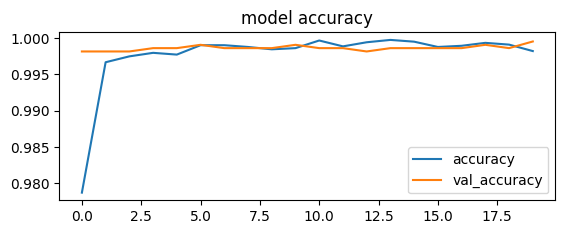

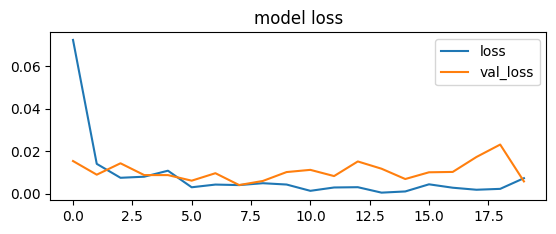

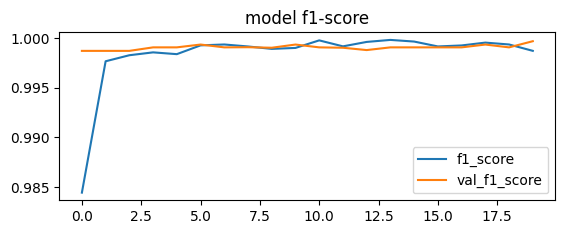

In [ ]:
plot_learning(history)

In [ ]:
# unique, counts = np.unique(y_test, return_counts=True)
# print(f"The testing set contains {counts[0]} normal recordings and {counts[1]} with myocardial infarction.\nLet's compute the confusion matrix.")

In [ ]:
results = model.evaluate(np.expand_dims(X_test, axis=2), y_test, batch_size=32)
print(f"The accuracy on the testing set is {np.round(results[1]*100,1)}%")

69/69 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 0.9995 - f1_score: 0.9997
The accuracy on the testing set is 100.0%


In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(np.expand_dims(X_test, axis=2))
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

69/69 [==============================] - 0s 5ms/step


ValueError: ignored

In [ ]:
# y_pred = model.predict(np.expand_dims(X_test, axis=2))
# y_pred_ptbdb_bool = np.argmax(y_pred, axis=1)
# print(classification_report(y_test, y_pred_ptbdb_bool))

# confusion_matrix = tf.math.confusion_matrix(y_test, y_pred_ptbdb_bool)
# print(f"Confusion matrix :\n {confusion_matrix}")


69/69 [==============================] - 1s 6ms/step
              precision    recall  f1-score   support

         0.0       0.28      1.00      0.44       609
         1.0       0.00      0.00      0.00      1574

    accuracy                           0.28      2183
   macro avg       0.14      0.50      0.22      2183
weighted avg       0.08      0.28      0.12      2183

Confusion matrix :
 [[ 609    0]
 [1574    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(f"{confusion_matrix[0][0]}/{counts[0]} MI were correctly classified")

print(f"{confusion_matrix[1][1]}/{counts[1]} normal beats were correctly classified")

print(f"{confusion_matrix[1][0]} beats were classified as MI")

print(f"{confusion_matrix[0][1]} MI were classified as normal")

609/609 MI were correctly classified
0/1574 normal beats were correctly classified
1574 beats were classified as MI
0 MI were classified as normal
